## Import Libraries

In [154]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import inv, inv
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Import and Inspect Dataset

In [198]:
# Import Dataset

houses = pd.read_csv("C:\\Users\\HA432CU\\Machine Learning\\Linear Regression\\Housing.csv")

In [3]:
houses

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
# Inspect Houses dataframe shape
# It contains 545 rows and 13 columns

houses.shape

(545, 13)

In [5]:
# 13 columns in total
houses.info()

# We see that 6 of them hold numerical values and 7 of them are categorical variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


__13 columns in total. 6 hold numerical data and 7 catagorical data__
* price = price of real estate - __numerical__
* area = total area of property ($ft^{2}$) - __numerical__
* bedrooms = # of bedrooms - __numerical__
* bathrooms = # of bathrooms - __numerical__ 
* stories = # of stories - __numerical__
* mainroad = located in a mainroad - __categorical__
* guestroom = property has at least one guestroom - __categorical__
* basement = property has a basement - __categorical__
* hotwaterheating = property has a heater for water - __categorical__
* airconditioning = property has air-conditioning - __categorical__
* parking = property includes parking spots - __numerical__
* prefarea = house location is generaly prefered - __categorical__
* furnishingstatus = house is furnished, semi furnished or unfernished - __categorical__

In [6]:
# Inspect Dataset
# head,tail and describe method

print(houses.head())
print(houses.tail())

print(houses.describe())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
540  1820000  3000 

In [7]:
houses.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
# Area is in ft^2
# Make Area in m^2

houses['area'] = round(houses['area']/10.764)

## Vizualize Data

In [9]:
def my_plot_func(feature1, feature2 = None, action='scatter-plot'):
    if action not in ["scatter-plot", "line", "histogram"]:
        raise ValueError("Invalid action. Please choose 'scatter-plot', 'line', or 'histogram'.")
    if action == 'histogram':
        plt.hist(feature1, bins=10, color='blue', alpha=0.7)
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title('Histogram of Feature1')
    else:
        if feature2 is None:
            raise ValueError("For scatter-plot and line, both features must be provided.")
        
        if action == "scatter-plot":
            plt.scatter(feature1, feature2, color='blue', alpha=0.7)
            plt.xlabel('Feature1')
            plt.ylabel('Feature2')
            plt.title('Scatter Plot')
        elif action == "line":
            plt.plot(feature1, feature2, color='blue')
            plt.xlabel('Feature1')
            plt.ylabel('Feature2')
            plt.title('Line Plot')

    plt.show()

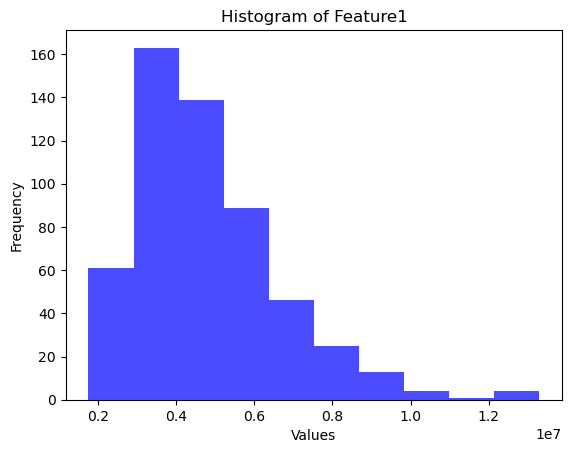

In [10]:
# Vizualize price column values in a histogram

my_plot_func(houses.price, action = 'histogram')

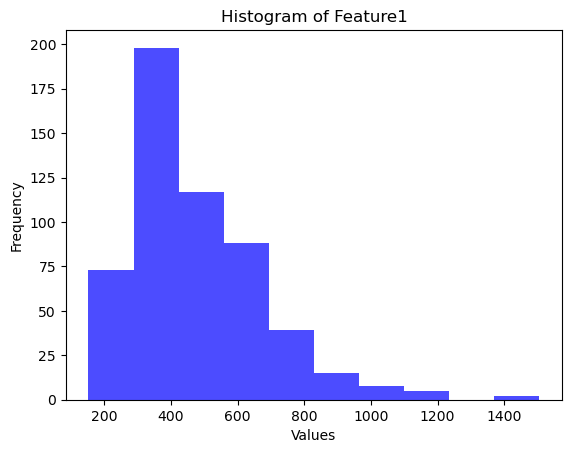

In [11]:
# Vizualize area column values in a histogram

my_plot_func(houses.area, action = 'histogram')

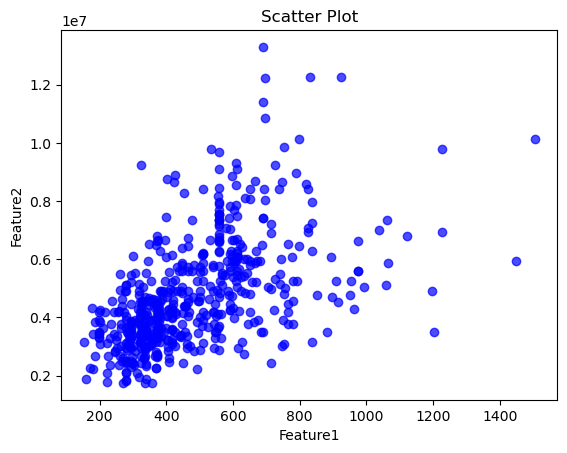

In [12]:
# Vizualize area-price scatter plot

my_plot_func(houses.area, houses.price, action = 'scatter-plot')

# We realize that the data do not fit the linear regression model as well as we hoped for. 
# There are some outliers that we should eliminate.

## Identify Outliers - IQR Method

### Price Outliers

In [13]:
# Examine the price column for outliers
# We will use the Interquartile Range (IQR)
# ----------------------------------------------------------------------------------------------- #
# Step 1: Sort data in ascending order
# Step 2: Identify the first and third quartiles, Q1 and Q3 respectively
# Step 3: Calculate IQR. IQR = Q3 - Q1
# Step 4: Calculate your upper fence = Q3 + (1.5 * IQR)
# Step 5  Calculate your lower fence = Q1 – (1.5 * IQR)
# Step 6: Use your fences to highlight any outliers, all values that fall outside your fences.
# ----------------------------------------------------------------------------------------------- #

def IQR_stndrd_implementation(dataframe, dataframe_col1):

    my_plot_func(dataframe_col1, action = 'histogram')

#     houses = pd.read_csv("C:\\Users\\HA432CU\\Machine Learning\\Linear Regression\\Housing.csv")
    print(dataframe.shape)
    
    # Step 1: Sort data in ascending order
    sorted_col = np.array(sorted(dataframe_col1, reverse = False))
    
    # Step 2: Identify the first and third quartiles, Q1 and Q3 respectively
    sorted_percentiles = np.percentile(sorted_col, [25, 50, 75])
#     print(prices_sorted_percentiles)
    
    Q1 = sorted_percentiles[0]
#     print(Q1_prices)
    Q3 = sorted_percentiles[2]
#     print(Q3_prices)
    
    # Step 3: Calculate IQR. IQR = Q3 - Q1
    IQR = Q3 - Q1
#     print(IQR_prices)
    
    # Step 4: Calculate your upper fence = Q3 + (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
#     print(upper_limit_prices)
    
    # Step 5  Calculate your lower fence = Q1 – (1.5 * IQR)
    lower_limit = Q1 - (1.5 * IQR)
#     print(lower_limit_prices)
    
    # Step 6: Use your fences to highlight any outliers, all values that fall outside your fences
    new_dataframe = dataframe[(dataframe_col1 <= upper_limit) & (dataframe_col1 >= lower_limit)]
    new_dataframe_col1 = new_dataframe[dataframe_col1.name] 
    
    dict_IQR_stndrd_implementation = {'Q1':Q1
                                     ,'Q3':Q3
                                     ,'IQR':IQR
                                     ,'upper_limit':upper_limit
                                     ,'lower_limit':lower_limit
                                     }
    
    return  new_dataframe.shape, new_dataframe.head(), dict_IQR_stndrd_implementation, my_plot_func(new_dataframe_col1, action = 'histogram') 
         

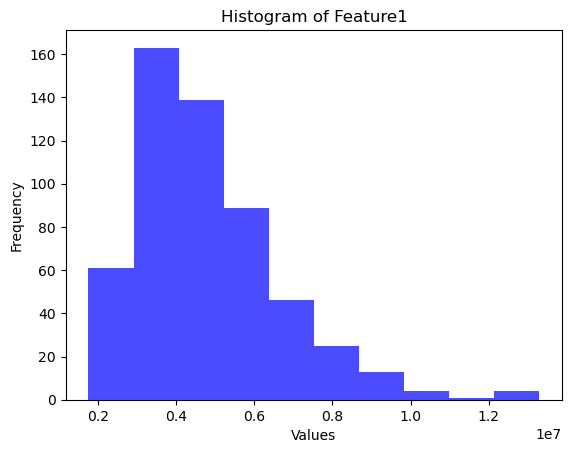

(545, 13)


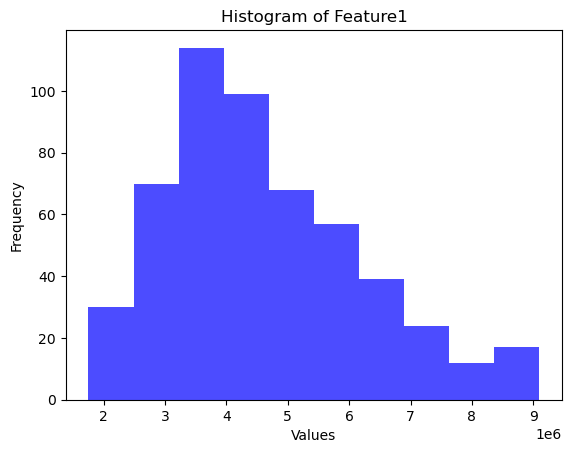

((530, 13),
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 15  9100000  6000         4          1        2      yes        no      yes   
 16  9100000  6600         4          2        2      yes       yes      yes   
 17  8960000  8500         3          2        4      yes        no       no   
 18  8890000  4600         3          2        2      yes       yes       no   
 19  8855000  6420         3          2        2      yes        no       no   
 
    hotwaterheating airconditioning  parking prefarea furnishingstatus  
 15              no              no        2       no   semi-furnished  
 16              no             yes        1      yes      unfurnished  
 17              no             yes        2       no        furnished  
 18              no             yes        2       no        furnished  
 19              no             yes        1      yes   semi-furnished  ,
 {'Q1': 3430000.0,
  'Q3': 5740000.0,
  'IQR': 2310000.0,
  'upper_

In [14]:
houses = pd.read_csv("C:\\Users\\HA432CU\\Machine Learning\\Linear Regression\\Housing.csv")

IQR_stndrd_implementation(houses,houses.price)

### Area Outliers

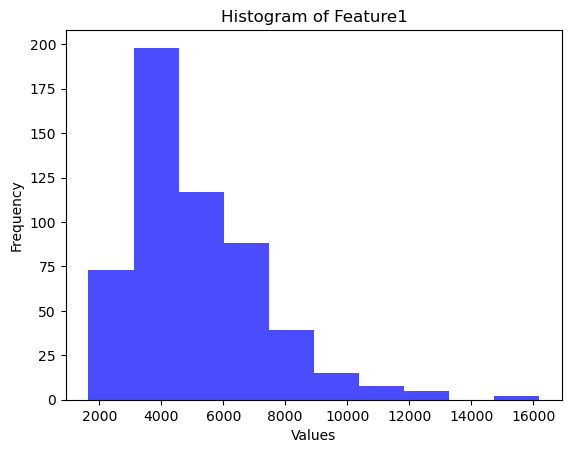

(545, 13)


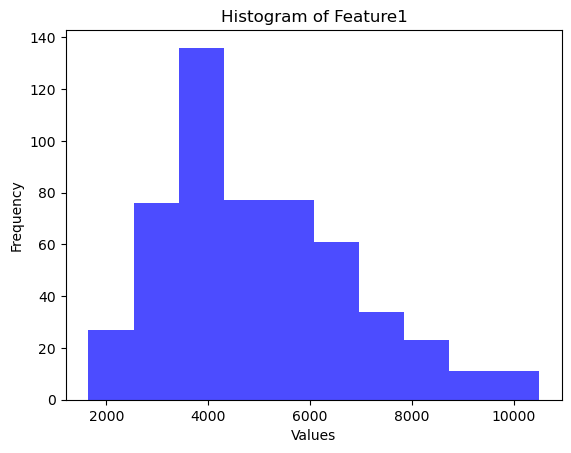

((533, 13),
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 0  13300000  7420         4          2        3      yes        no       no   
 1  12250000  8960         4          4        4      yes        no       no   
 2  12250000  9960         3          2        2      yes        no      yes   
 3  12215000  7500         4          2        2      yes        no      yes   
 4  11410000  7420         4          1        2      yes       yes      yes   
 
   hotwaterheating airconditioning  parking prefarea furnishingstatus  
 0              no             yes        2      yes        furnished  
 1              no             yes        3       no        furnished  
 2              no              no        2      yes   semi-furnished  
 3              no             yes        3      yes        furnished  
 4              no             yes        2       no        furnished  ,
 {'Q1': 3600.0,
  'Q3': 6360.0,
  'IQR': 2760.0,
  'upper_limit': 10500.0

In [15]:
IQR_stndrd_implementation(houses,houses.area)

## Identify Outliers - Z-Score Method

Z-Score = (X-m)/σ

In [16]:
# We will implement the Z-Score method to identify outliers and exclude them form our dataset #
# Typical Z-Score values for a normal distribution is +/- 3. #
# As we saw in the previous steps our price and area data don't follow a normal distribution. #
# The threshold value for the z-score will be determined through trial and error. #
# The Z-score is calculated by subtracting the mean from each observation and then deviding by the standard deviation. #

# Select only numeric columns

houses = pd.read_csv("C:\\Users\\HA432CU\\Machine Learning\\Linear Regression\\Housing.csv")
print(houses.shape)

numeric_houses_columns = houses.select_dtypes(include = 'number')

houses_std = numeric_houses_columns.std()
print(houses_std)

houses_mean = numeric_houses_columns.mean()
print(houses_mean)

(545, 13)
price        1.870440e+06
area         2.170141e+03
bedrooms     7.380639e-01
bathrooms    5.024696e-01
stories      8.674925e-01
parking      8.615858e-01
dtype: float64
price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64


In [17]:
print(houses_mean[['price']])

price    4.766729e+06
dtype: float64


In [18]:
z_score_price = (houses['price']-houses_mean.loc['price'])/houses_std.loc['price']

In [19]:
print(z_score_price,type(z_score_price))

0      4.562174
1      4.000809
2      4.000809
3      3.982096
4      3.551716
         ...   
540   -1.575421
541   -1.603676
542   -1.612845
543   -1.612845
544   -1.612845
Name: price, Length: 545, dtype: float64 <class 'pandas.core.series.Series'>


In [20]:
outliers_price = houses[abs(z_score_price) > 3]

In [21]:
houses_no_price_outliers = houses[abs(z_score_price) <= 3]

In [22]:
houses_no_price_outliers.shape

(539, 13)

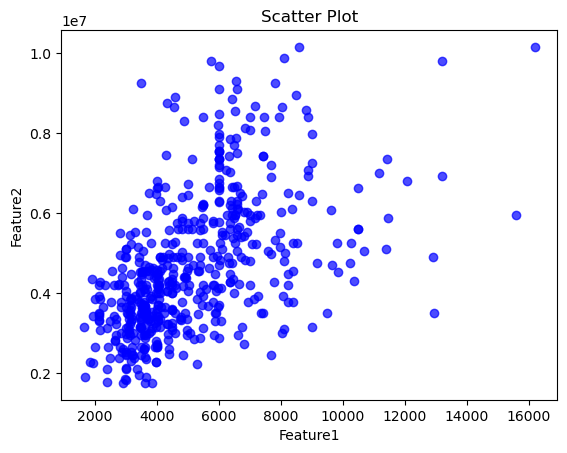

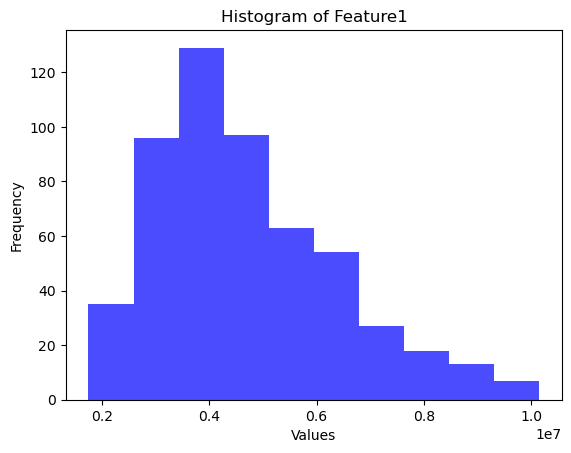

In [23]:
my_plot_func(houses_no_price_outliers.area, houses_no_price_outliers.price, action = 'scatter-plot')
my_plot_func(houses_no_price_outliers.price, action = 'histogram')

#### IQR vs Z-Score

Using the IQR method can find more "outliers" than using the Z-Score method. It depends on the distribution of the data. Data that's peaked with long tails will have a comparatively low IQR, so the IQR method will find lots of outliers. For a normal distribution the Z-Score is a good choice. But in our case the data distribution is skewed towards the lower end of the price column as well as the area column.

In our case we will use the IQR method to remove outliers.

## Smoothing the Data

In this case we will use the logarithmic scale to represent the area column. 

In [199]:
houses['log_area'] = np.log10(houses.area)

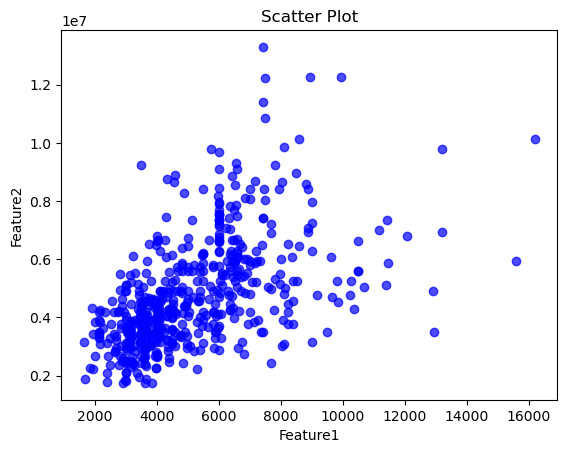

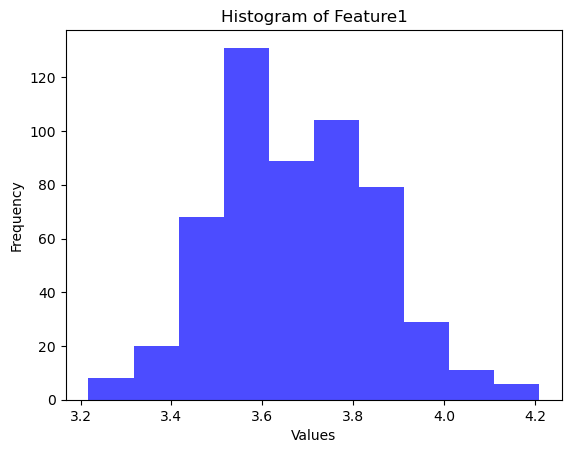

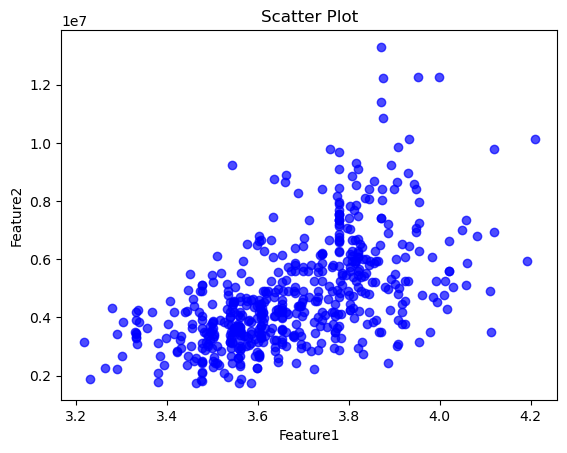

In [25]:
my_plot_func(houses.area, houses.price, action = 'scatter-plot')
my_plot_func(houses.log_area, action = 'histogram')
my_plot_func(houses.log_area, houses.price, action = 'scatter-plot')

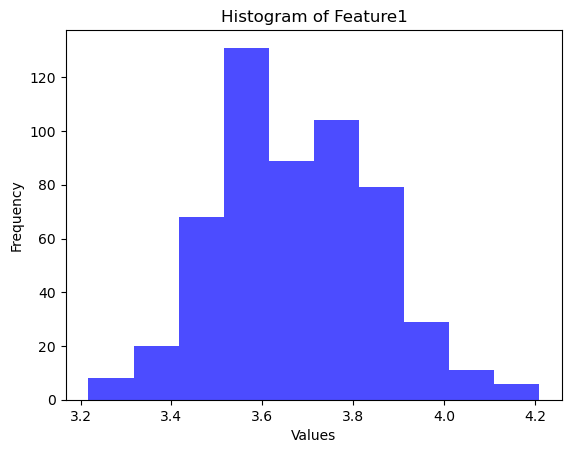

(545, 14)


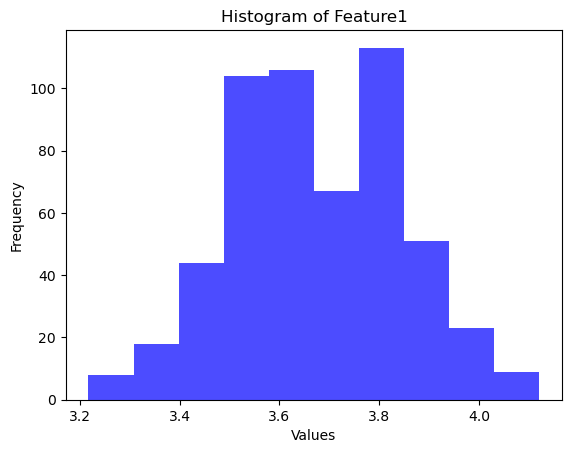

((543, 14),
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 0  13300000  7420         4          2        3      yes        no       no   
 1  12250000  8960         4          4        4      yes        no       no   
 2  12250000  9960         3          2        2      yes        no      yes   
 3  12215000  7500         4          2        2      yes        no      yes   
 4  11410000  7420         4          1        2      yes       yes      yes   
 
   hotwaterheating airconditioning  parking prefarea furnishingstatus  log_area  
 0              no             yes        2      yes        furnished  3.870404  
 1              no             yes        3       no        furnished  3.952308  
 2              no              no        2      yes   semi-furnished  3.998259  
 3              no             yes        3      yes        furnished  3.875061  
 4              no             yes        2       no        furnished  3.870404  ,
 {'Q1': 3.556

In [26]:
IQR_stndrd_implementation(houses,houses.log_area)

## Mahalanobis Distance

The Mahalanobis distance is a measure of the distance between a point __P__ and a distribution __D__

It is a multivariate generalization of standard z-score we used earlied.

In [57]:
def mahalanobis_distance(dataframe, dataframe_columns, threshold):
    # Convert dataframe columns to a numpy array
    np_array_dataframe_columns = dataframe[dataframe_columns].values
    
    # Calculate mean of the columns
    np_mean_dataframe_columns = np.mean(np_array_dataframe_columns, axis=0)
    
    # Calculate covariance matrix of the columns
    np_cov_dataframe_columns = np.cov(np_array_dataframe_columns, rowvar=False)
    
    distances = []
    
    # Calculate Mahalanobis Distances for each data point
    for _, row in dataframe.iterrows():
        data_point = row[dataframe_columns].values
    
        # Calculate Mahalanobis Distance
        diff = data_point - np_mean_dataframe_columns
        inv_covariance_matrix = inv(np_cov_dataframe_columns)
        mahalanobis_distance = np.sqrt(np.dot(np.dot(diff, inv_covariance_matrix), diff.T))
    
        distances.append(mahalanobis_distance)

    # distances now contains the Mahalanobis distances for each data point
    mahalanobis_series = pd.Series(distances, name='Mahalanobis Distance')
    
    # Set a Mahalanobis Distance threshold
    mahalanobis_threshold = threshold
    
    # Identify and exclude outliers
    outliers_mask = mahalanobis_series > mahalanobis_threshold
    filtered_data = dataframe[~outliers_mask]
    outliers = dataframe[outliers_mask]
    
    print("\nOriginal Data")
    my_plot_func(houses.price, houses.log_area ,action = 'scatter-plot')
    print("\nNew Data")
    my_plot_func(filtered_data.price, filtered_data.log_area ,action = 'scatter-plot')
    
    # Display the results
    print("\nOutliers:")
    print(outliers)
    print(filtered_data.shape)
    
    return filtered_data


Original Data


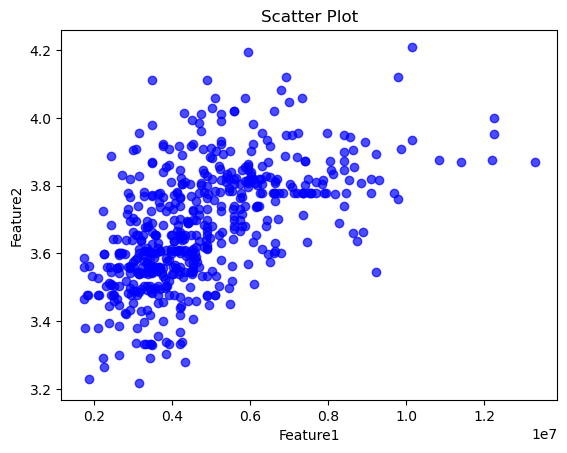


New Data


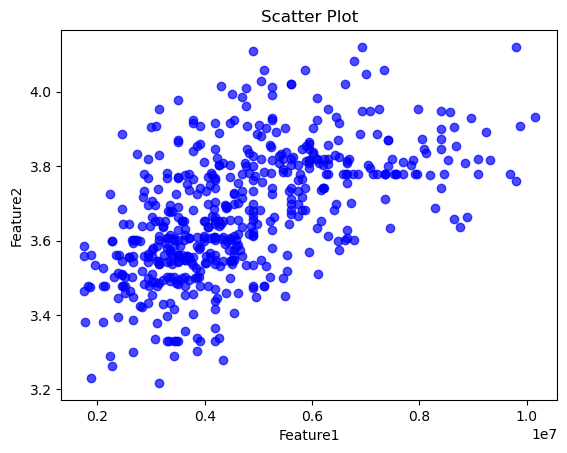


Outliers:
        price   area  bedrooms  bathrooms  stories mainroad guestroom  \
0    13300000   7420         4          2        3      yes        no   
1    12250000   8960         4          4        4      yes        no   
2    12250000   9960         3          2        2      yes        no   
3    12215000   7500         4          2        2      yes        no   
4    11410000   7420         4          1        2      yes       yes   
5    10850000   7500         3          3        1      yes        no   
7    10150000  16200         5          3        2      yes        no   
13    9240000   3500         4          2        2      yes        no   
125   5943000  15600         3          1        1      yes        no   
403   3500000  12944         3          1        1      yes        no   

    basement hotwaterheating airconditioning  parking prefarea  \
0         no              no             yes        2      yes   
1         no              no             yes        3

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_area
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,3.933487
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,3.908485
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,3.759668
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished,4.120574
11,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished,3.778151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,3.477121
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,3.380211
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,3.558709
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,3.463893


In [173]:
# Example usage:
# Assuming 'houses' is your dataframe and ['price', 'area'] are the columns of interest
mahalanobis_distance(houses, ['price', 'log_area'], 3.0)

In [48]:
print(houses.corr(method = 'pearson'))

              price      area  bedrooms  bathrooms   stories   parking  \
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394   
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980   
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270   
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496   
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547   
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000   
log_area   0.561231  0.964328  0.150460   0.202610  0.108145  0.360774   

           log_area  
price      0.561231  
area       0.964328  
bedrooms   0.150460  
bathrooms  0.202610  
stories    0.108145  
parking    0.360774  
log_area   1.000000  


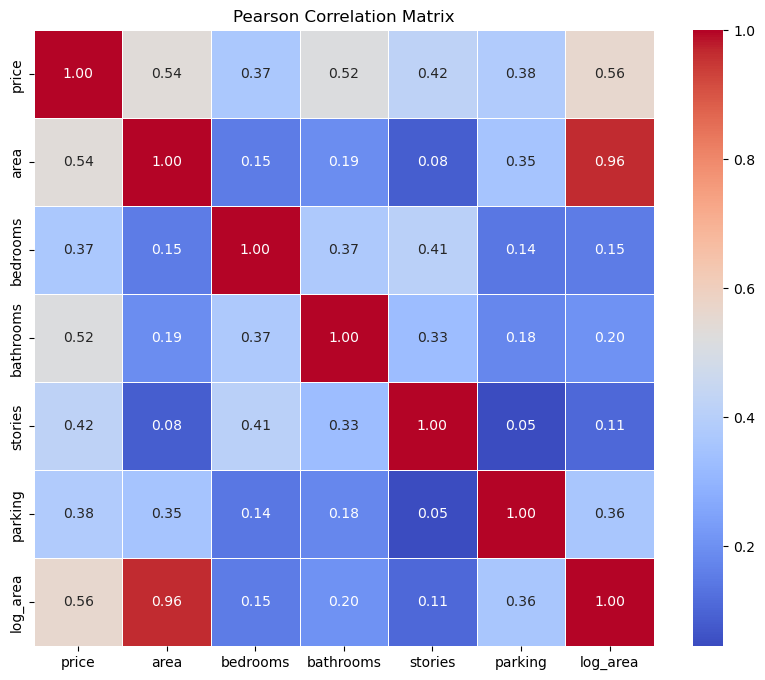

In [52]:
import seaborn as sns

# Calculate Pearson correlation matrix
correlation_matrix = houses.corr(method = 'pearson')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Matrix')
plt.show()

The correlation table indicates the following:
* area and specifically the logarithmic scale of the area as well as number of bathrooms are the strongest indicators for pricing, though generally speaking moderate. 
* parking, number of bedrooms and stories show weak correlation 

The rest of the analysis will be applied to a new dataset. This dataset will contain the columns price, area, log_area and bathrooms

In [272]:
new_houses = houses[['price','area','log_area','bathrooms']]

Removing outliers using the mahalanobis distance


Original Data


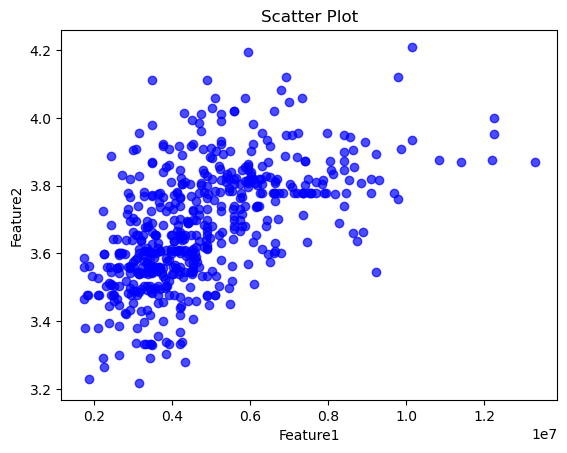


New Data


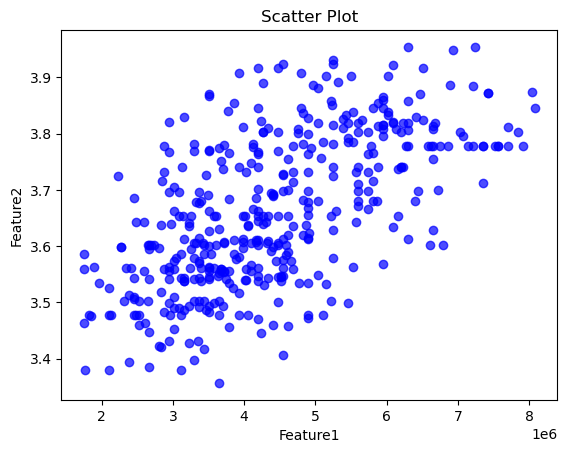


Outliers:
        price  area  log_area  bathrooms
0    13300000  7420  3.870404          2
1    12250000  8960  3.952308          4
2    12250000  9960  3.998259          2
3    12215000  7500  3.875061          2
4    11410000  7420  3.870404          1
..        ...   ...       ...        ...
520   2450000  7700  3.886491          1
523   2380000  2787  3.445137          2
527   2275000  1836  3.263873          1
530   2240000  1950  3.290035          1
537   1890000  1700  3.230449          1

[120 rows x 4 columns]
(425, 4)


In [273]:
new_houses_wout_outliers = mahalanobis_distance(new_houses, ['price','log_area','bathrooms'], 2.0)

In [281]:
print(new_houses_wout_outliers.shape)

# Function to generate synthetic data using resampling
def generate_synthetic_data(original_data, num_samples):
    synthetic_data = pd.DataFrame()

    for column in original_data.columns:
        # Resample with replacement to create synthetic samples
        synthetic_data[column] = np.random.choice(original_data[column], size=num_samples)

    return synthetic_data

# Generate synthetic data
synthetic_data = generate_synthetic_data(new_houses_wout_outliers, num_samples = new_houses_wout_outliers.shape[0])

# Display the synthetic data
print(synthetic_data.shape)

frames = [new_houses_wout_outliers, synthetic_data]
houses_augmented = pd.concat(frames)

print(houses_augmented.shape)

(425, 4)
(425, 4)
(850, 4)


## Train and Test Set

In [278]:
# Specify the features (X) and target variable (y)
X = houses_augmented[['log_area','bathrooms']]
y = houses_augmented['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [279]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(680, 2)
(680,)
(170, 2)
(170,)


In [280]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1242494.6791873183


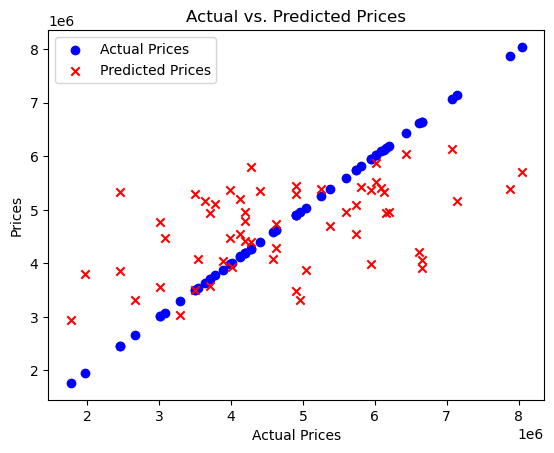

In [254]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted prices with different markers
plt.scatter(y_test, y_test, color='blue', marker='o', label='Actual Prices')
plt.scatter(y_test, y_pred, color='red', marker='x', label='Predicted Prices')

plt.xlabel('Actual Prices')
plt.ylabel('Prices')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()



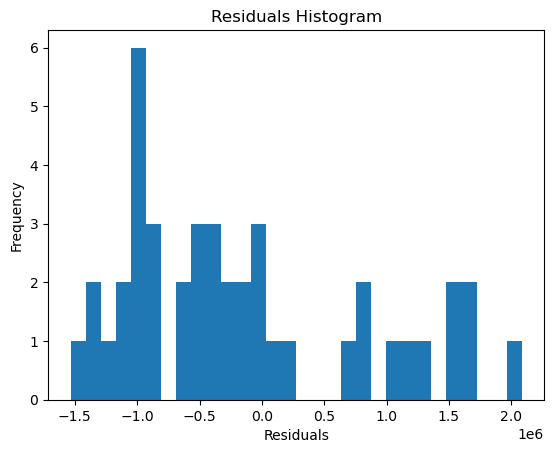

In [136]:
residuals = y_test - y_pred

plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Histogram')
plt.show()